In [1]:
import os
import sys
import time
import numpy as np
import skimage
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit


In [2]:
test = np.loadtxt("archive/fashion-mnist_test.csv", delimiter=',', skiprows=1)
train = np.loadtxt("archive/fashion-mnist_train.csv",
                   delimiter=',', skiprows=1)

test = test[1:]
train = train[1:]

data = np.vstack((train, test))

X = data[:, 1:]
y = data[:, 0]

X = np.array(X)
y = np.array(y, dtype=np.uint8)


print(X.shape, y.shape)


(69998, 784) (69998,)


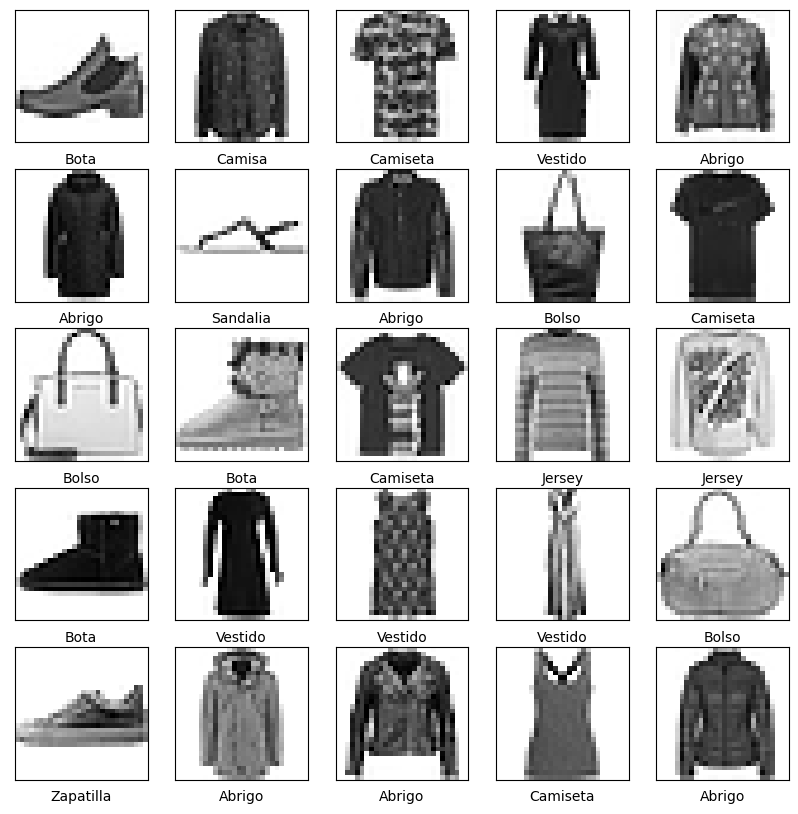

In [3]:
clases = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido',
          'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(clases[int(y[i])])
plt.show()


In [4]:

rs = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
for train_index, test_index in rs.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


print("SHAPE Xtrain", X_train.shape)
print("SHAPE y_train", y_train.shape)
print("SHAPE X_test", X_test.shape)
print("SHAPE y_test", y_test.shape)


SHAPE Xtrain (55998, 784)
SHAPE y_train (55998,)
SHAPE X_test (14000, 784)
SHAPE y_test (14000,)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

startTimer = time.perf_counter()

C_values = [0.1, 1.0, 5.0, 7.5, 10.0]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Genera el diccionario param_grid con los valores indicados
param_grid = {'C': C_values, 'gamma': gamma_values}

# Genera el objeto ShuffleSplit para generar un único particionado fijo, con 20% de datos de validación y
# random_state = 0
rs = ShuffleSplit(n_splits=1, test_size=.20, random_state=0)

# Haz la llamada a la función GridSearchCV con un clasificador SVC y el diccionario de parámetros definido
# Para acelerar algo el entrenamiento, emplea también el parámetro n_jobs=-1, que hará que se aproveche mejor el
# procesador de tu equipo.
clasificadores = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1, cv=rs)

# Entrena el modelo interno de GridSearchCV, y después obten los mejores valores de C y gamma en C_best y gamma_best
clasificadores.fit(X_train, y_train)

C_best = clasificadores.best_params_["C"]
gamma_best = clasificadores.best_params_["gamma"]

print("Mejores parámetros C: {}, gamma: {}".format(C_best, gamma_best))

# Crea y entrena un modelo SVC con C_best y gamma_best sobre los datos de train originales (X e y)
clf = svm.SVC(C=C_best, gamma=gamma_best)
clf.fit(X_train, y_train)

# Realizamos predicciones con el clasificador entrenado
y_pred = clf.predict(X_test)

# Calculamos el porcentaje de acierto
accuracy = np.mean(y_pred == y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

# Detenemos el contador de tiempo
endTimer = time.perf_counter()

# Calculamos el tiempo transcurrido
elapsed = endTimer - startTimer
# Obtenemos el tiempo transcurrido en minutos y segundos
minutes, seconds = divmod(elapsed, 60)

# Mostramos el tiempo transcurrido en minutos y segundos
print(f"Tiempo transcurrido: {minutes:.0f} minutos {seconds:.2f} segundos")


In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.8892142857142857


              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1390
           1       1.00      0.97      0.99      1365
           2       0.81      0.82      0.81      1407
           3       0.87      0.91      0.89      1380
           4       0.82      0.85      0.83      1477
           5       0.96      0.96      0.96      1467
           6       0.75      0.65      0.69      1425
           7       0.93      0.95      0.94      1322
           8       0.98      0.97      0.98      1392
           9       0.97      0.96      0.96      1375

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



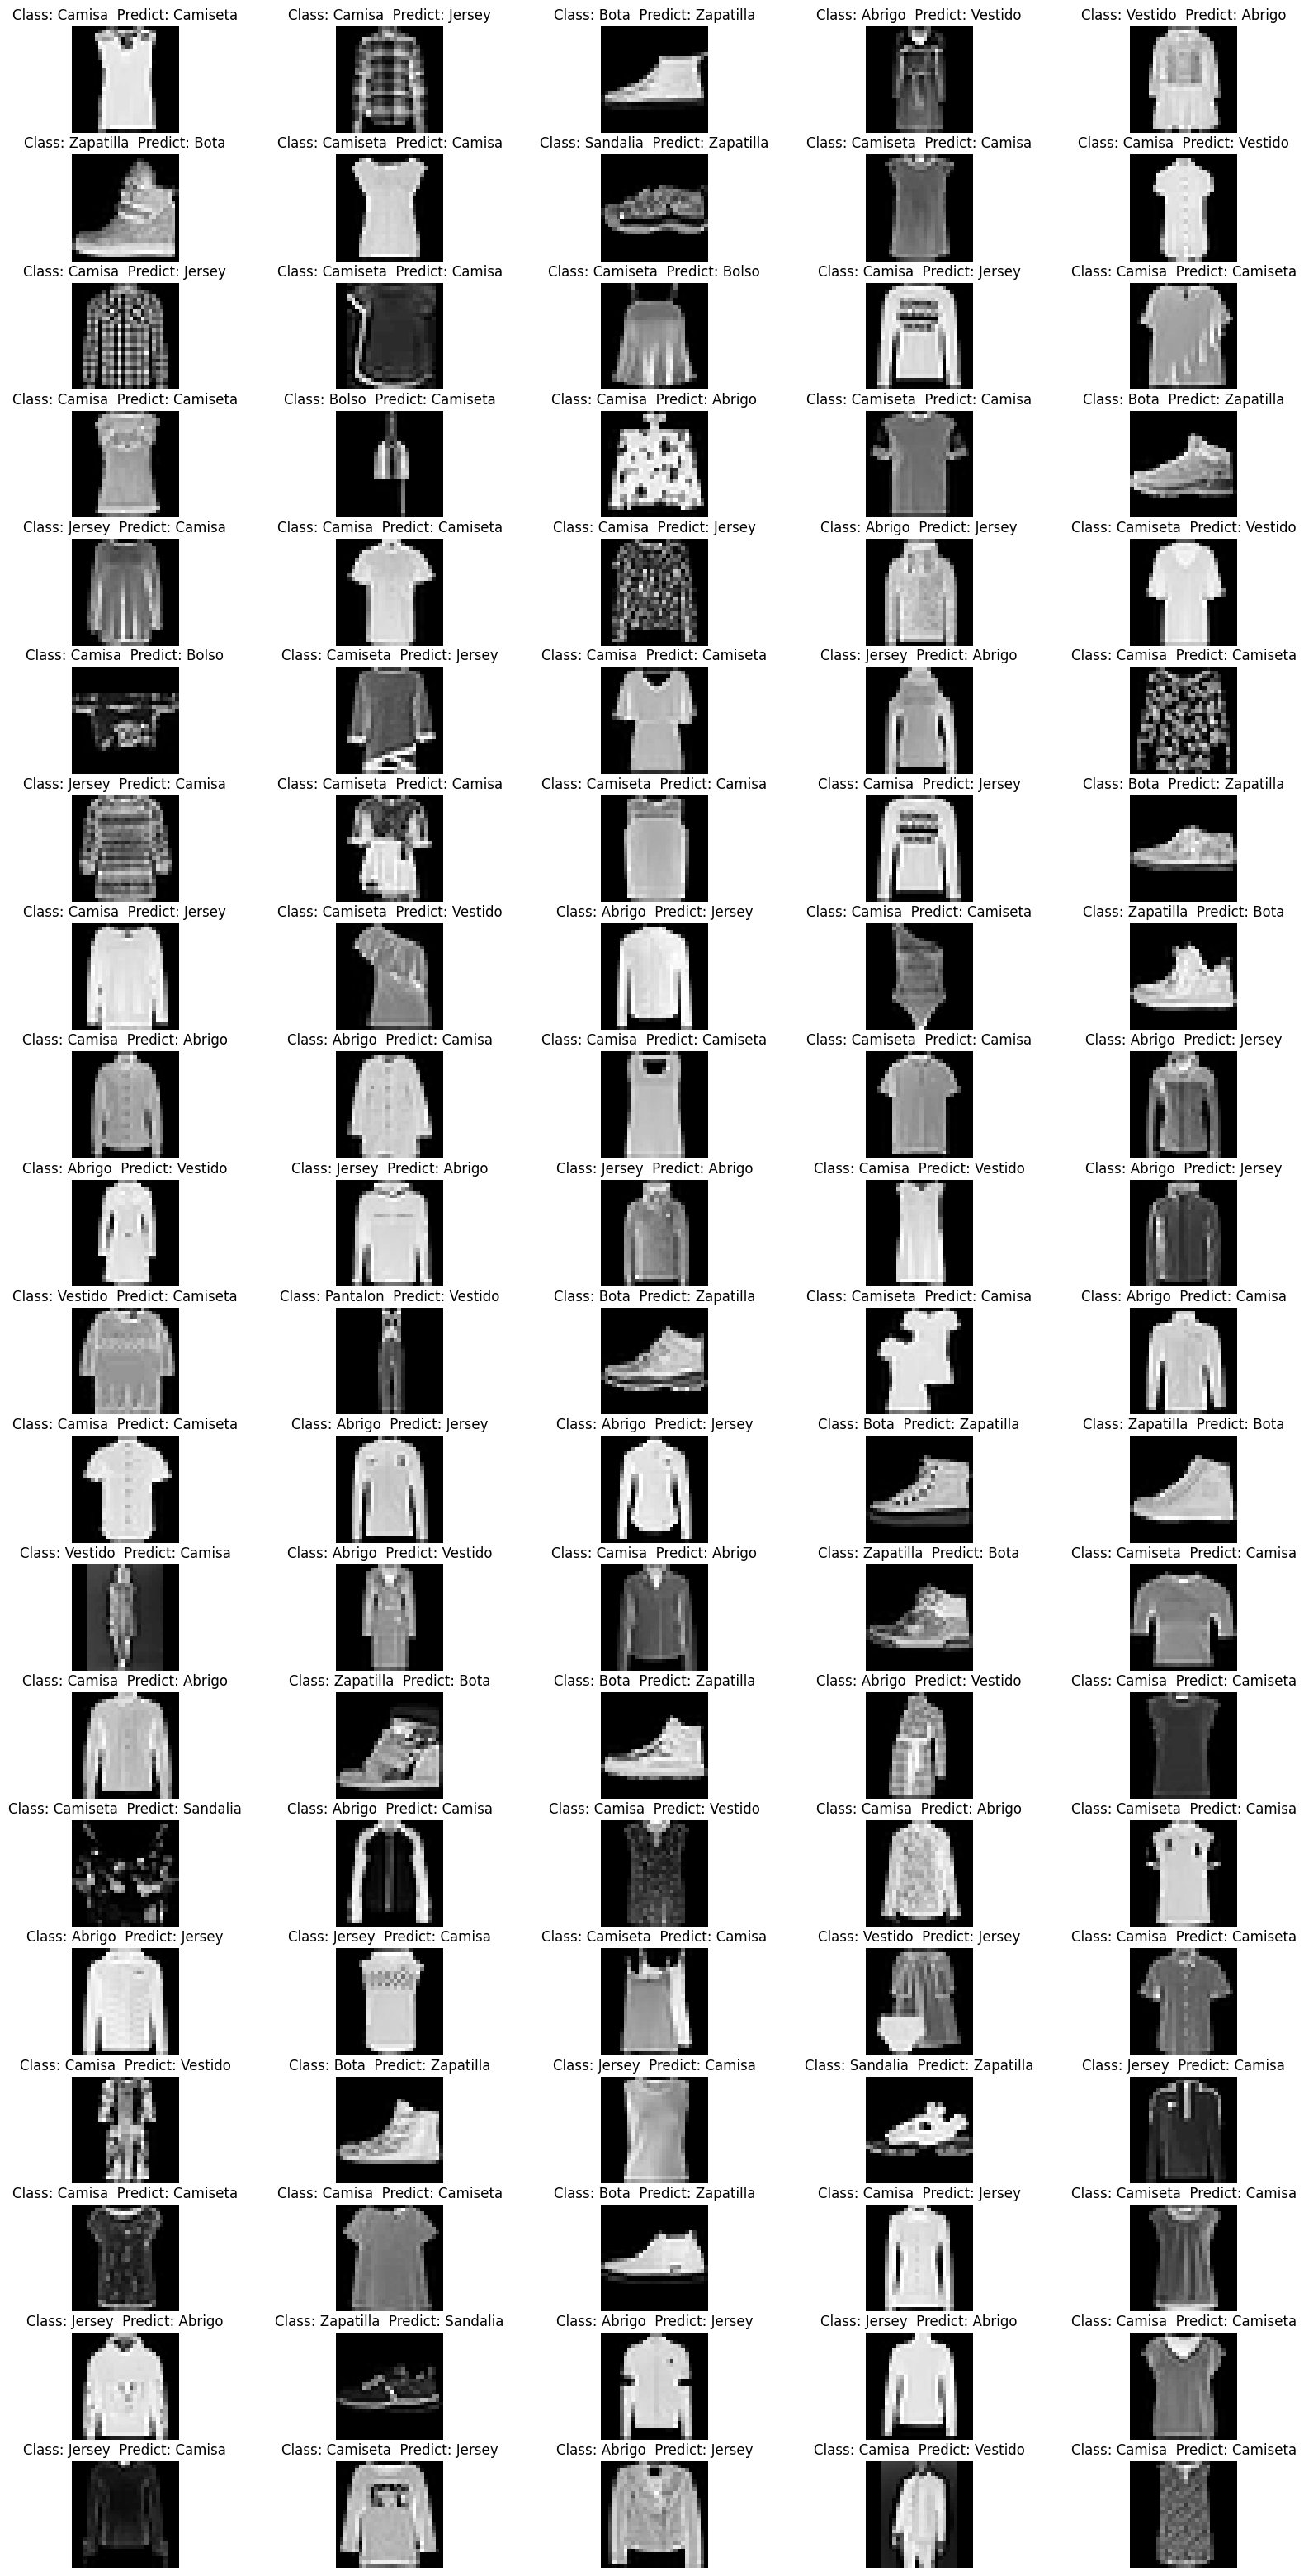

In [6]:
mask = np.array(y_pred != y_test).ravel()
X_mal = X_test[mask]
y_mal = y_test[mask]
y_pred_mal = y_pred[mask]

size = 100
col = 5
row = int(np.ceil(size / col))
fig, axes = plt.subplots(row, col, figsize=(2*2*col, 2*row))

for degree in range(size):
    index = np.random.randint(0, X_mal.shape[0])
    img = X_mal[index, :].reshape(28, 28)
    axes.ravel()[degree].imshow(img, cmap=plt.cm.gray)
    axes.ravel()[degree].set_title(f'Class: {clases[int(y_mal.flat[index])]}  Predict: {clases[int(y_pred_mal.flat[index])]}')
    axes.ravel()[degree].axis('off')

<BarContainer object of 10 artists>

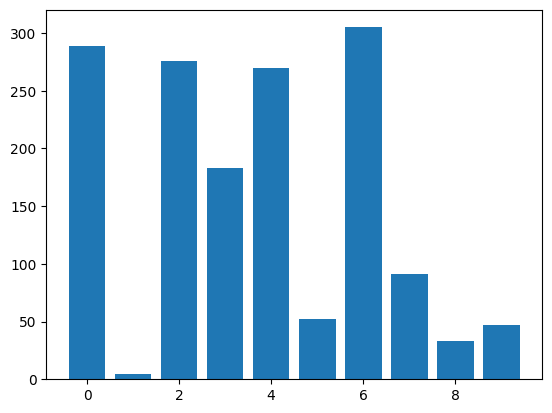

In [7]:
classes = np.arange(10)
valores = np.zeros(10)
for i in range(10):
    valores[i] = np.sum(y_pred[mask]==i)
plt.bar(classes, valores)

c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

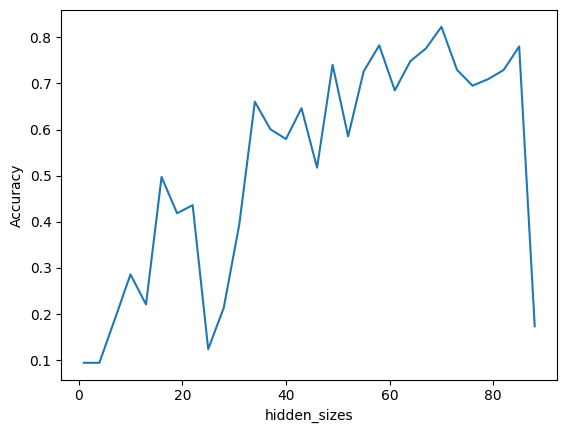

In [8]:
from sklearn.neural_network import MLPClassifier

hidden_sizes = range(1, 90, 3)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes = size, solver = 'lbfgs', max_iter = 300, alpha=0.01)
    
    clasificador.fit(X_train,y_train.ravel())
    
    y_pred = clasificador.predict(X_test)
    
    accTrain = accuracy_score(y_pred, y_test)
    
    accuracies[s] = accTrain

# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

70


In [11]:
clasificador = MLPClassifier( hidden_layer_sizes=70, solver='lbfgs', max_iter=1000, alpha =0.001 )

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.7945714285714286


              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1390
           1       0.98      0.95      0.97      1365
           2       0.71      0.61      0.66      1407
           3       0.85      0.84      0.84      1380
           4       0.52      0.75      0.61      1477
           5       0.95      0.94      0.95      1467
           6       0.41      0.31      0.35      1425
           7       0.92      0.92      0.92      1322
           8       0.94      0.95      0.95      1392
           9       0.94      0.94      0.94      1375

    accuracy                           0.79     14000
   macro avg       0.80      0.80      0.79     14000
weighted avg       0.80      0.79      0.79     14000



c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
clasificador = MLPClassifier( hidden_layer_sizes=70, solver='adam', max_iter=3000, alpha =0.001 )

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8501428571428571


              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1390
           1       0.97      0.98      0.98      1365
           2       0.71      0.81      0.76      1407
           3       0.83      0.89      0.86      1380
           4       0.81      0.69      0.75      1477
           5       0.93      0.96      0.95      1467
           6       0.61      0.66      0.63      1425
           7       0.95      0.92      0.93      1322
           8       0.95      0.94      0.94      1392
           9       0.94      0.95      0.94      1375

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000



In [17]:
clasificador = MLPClassifier( hidden_layer_sizes=(70,30), solver='adam', max_iter=3000, alpha =0.01 )

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8639285714285714


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1390
           1       0.94      0.98      0.96      1365
           2       0.72      0.84      0.78      1407
           3       0.89      0.82      0.86      1380
           4       0.79      0.81      0.80      1477
           5       0.95      0.96      0.95      1467
           6       0.68      0.67      0.68      1425
           7       0.95      0.89      0.92      1322
           8       0.98      0.94      0.96      1392
           9       0.92      0.97      0.94      1375

    accuracy                           0.86     14000
   macro avg       0.87      0.86      0.87     14000
weighted avg       0.87      0.86      0.86     14000



Max accuracy con: 131


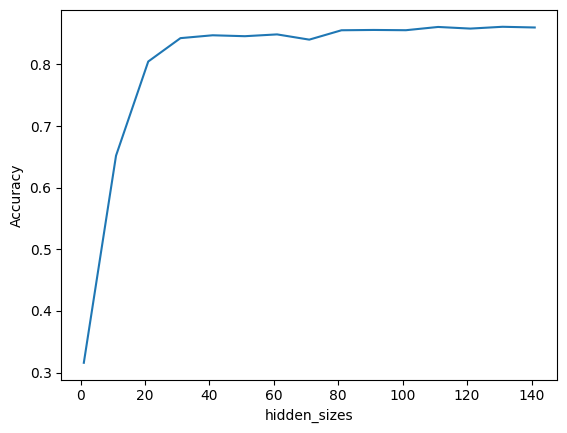

In [20]:
hidden_sizes = range(1, 150, 10)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes = size, solver = 'adam', max_iter = 2000, alpha=0.01)
    
    clasificador.fit(X_train,y_train.ravel())
    
    y_pred = clasificador.predict(X_test)
    
    accTrain = accuracy_score(y_pred, y_test)
    
    accuracies[s] = accTrain
    
print('Max accuracy con:', hidden_sizes[np.argmax(accuracies)])
print(max(accuracies))
# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

Max accuracy con: 61
0.8702857142857143


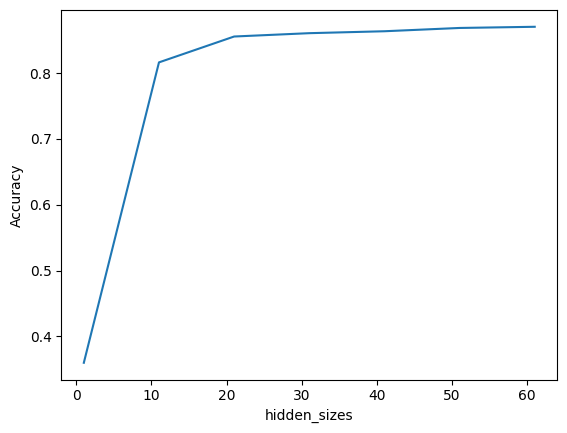

In [23]:
hidden_sizes = range(1, 70, 10)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes = (size,20,10), solver = 'adam', max_iter = 2000, alpha=0.01)
    
    clasificador.fit(X_train,y_train.ravel())
    
    y_pred = clasificador.predict(X_test)
    
    accTrain = accuracy_score(y_pred, y_test)
    
    accuracies[s] = accTrain
    
print('Max accuracy con:', hidden_sizes[np.argmax(accuracies)])
print(max(accuracies))
# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

In [27]:
clasificador = MLPClassifier( hidden_layer_sizes=(65, 20, 15,10), solver='adam', max_iter=3000, alpha =0.001 )

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8705714285714286


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1390
           1       0.98      0.97      0.98      1365
           2       0.78      0.79      0.79      1407
           3       0.84      0.90      0.87      1380
           4       0.81      0.79      0.80      1477
           5       0.96      0.95      0.96      1467
           6       0.67      0.71      0.69      1425
           7       0.96      0.91      0.93      1322
           8       0.97      0.96      0.96      1392
           9       0.91      0.97      0.94      1375

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



In [ ]:
hidden_sizes = range(1, 70, 5)
hidden_sizes2 = range(1, 30, 2)
accuracies = np.zeros(len(hidden_sizes)*len(hidden_sizes2))
best_sizes = np.zeros(2)
best_accuracy = 0
for size2 in hidden_sizes2:
    for s, size in enumerate(hidden_sizes):
        # Crea el clasificador con size neuronas en la capa oculta.
        # Después entrénalo, y obten la precisión en los datos de entrenamiento.
        # Guarda la precisión final en una variable accTrain.
        clasificador = MLPClassifier(hidden_layer_sizes = (size,size2), solver = 'adam', max_iter = 2000, alpha=0.005)
        
        clasificador.fit(X_train,y_train.ravel())
        
        y_pred = clasificador.predict(X_test)
        
        accuracy = accuracy_score(y_pred, y_test)
        if  accuracy > best_accuracy:
            best_accuracy = accuracy
            best_sizes[0] = size
            best_sizes[1] = size2
            
        accuracies[s] = accuracy
    
print('Max accuracy con:', best_sizes)
print(best_accuracy)
# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

In [2]:
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=2048, epochs=10,shuffle = 1,validation_split = 0.2, validation_data=(x_test, y_test))

Epoch 1/10
30/30 [==============================] - 0s 11ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 0.5561 - val_accuracy: 0.8969
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9855 - val_loss: 0.5564 - val_accuracy: 0.8984
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0428 - accuracy: 0.9855 - val_loss: 0.5552 - val_accuracy: 0.8981
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9859 - val_loss: 0.5600 - val_accuracy: 0.8974
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0425 - accuracy: 0.9856 - val_loss: 0.5569 - val_accuracy: 0.8980
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.5605 - val_accuracy: 0.8987
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.5625 - val_accuracy: 0.8980
Epoch 8/10
30/30 [=

In [18]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.564655601978302, 0.8980000019073486]
